## PyTorch Computer Vision

### 0. Computer Vision libraries in PyTorch

* `torchvision` - base library for computer vision
* `torchvision.datasets` - gets datasets and data loading functions
* `torchvision.models` - get pretrained computer vision models the you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data, to be suitable for use with ML model
* `torch.utils.data.dataset` - base dataset class for PyTorch
* `torch.utils.data.dataloader` - creates a python iterable over a dataset

In [2]:
# import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## 1. Getting a dataset

the dataset we'll be using is FashionMNIST database from torchvision.datasets

In [3]:
# Setup Training data
train_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=True, # do we want the training data set?
    download=True, # do we want to download?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=False, # do we want the training data set?
    download=True, # do we want to download?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.50MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 148kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.75MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 27.9MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training examples
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check the input and output shapes

In [9]:
# Check the shape
print(f"Image shape: {image.shape} -> [color_channels, height, width]") ## only 1 color channel, because pictures are black and white
print(f"label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
label: Ankle boot


## 1.2 Visualize our images/data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

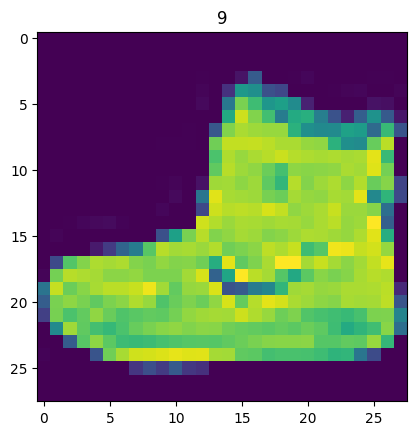

In [10]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

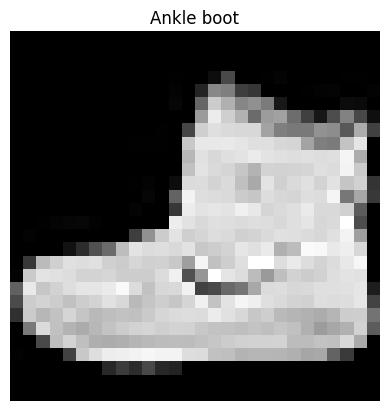

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

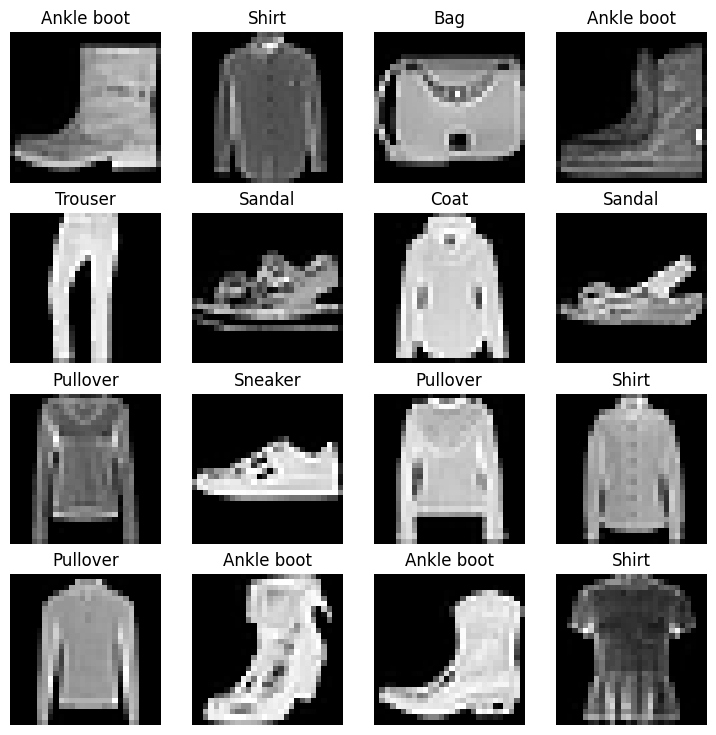

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare Dataloader

data is currently in the form of pytorch datasets

Dataloader turns our dataset into a python iterable - we want to turn our data into mini-batches

1. more computationally effiecient - computer hardware may not be able to look at 60000 images in 1 hit.
2. It gives out neural network more chances to update its gradients per epoch


In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size Hyperparameter
BATCH_SIZE = 32

# turn data into dataloader iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b88356a41a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b88356a4f50>)

In [15]:
# Lets checkout what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}, batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)}, batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b88356a41a0>, <torch.utils.data.dataloader.DataLoader object at 0x7b88356a4f50>)
Length of train_dataloader: 1875, batches of 32
Length of test_dataloader: 313, batches of 32


In [16]:
# check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


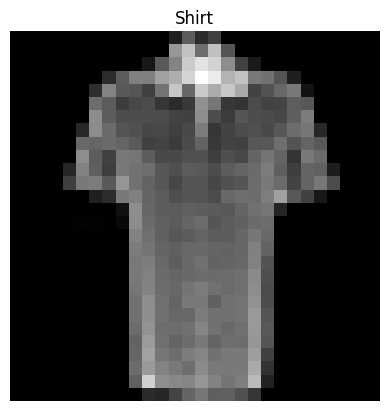

In [17]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model_0: Build a baseline model

Whens starting to build a series of machine learning modelling experiments, its important to start with a baseline model



In [18]:
from re import X
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) ## perform the forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape}     -> [color_channels, height*width]" )

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784])     -> [color_channels, height*width]


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [20]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,   # this is 28*28
    hidden_units=10,   ### how many units in the hidden layer
    output_shape=len(class_names)    ## 1 for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* loss function - with multiclass data, out loss will be `nn.CrossEntropyLoss`
* optimizer - out optimizer will be `toch.optim.SGD` for gradient descent
* Evauluation metric - since were working on a classification problem, lets use accuray

In [22]:
import requests
from pathlib import Path

# Download helper functions from learnPyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

downloading helper_function.py


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.1)


### 3.2 Creating a function to time out experiments


In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [25]:
start_time = timer()
## some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")


Train time on cpu: 0.000 seconds


4.346200000782119e-05

### 3.3 Creating a training loop and training a model on batches of data

* IMPORTANT: the optimizer will update a model's parameters after each batch instead of each epoch

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out whats happening
5. Time it all (for fun)

In [26]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## Model for recognizing clothing from database of 60000 images

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Setup the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs ( keep small for faster training time )
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss ( per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate the training loss values every batch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer Step
    optimizer.step()

    # Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)}")
  # divide total_train loss by length of train dataloader for average loss per epoch
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss accumulatively
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out whats happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 27.166 seconds


# 4. Make predictions and get model_0 results


In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicitons on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # scale the loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  ## only works when model was created with a different class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [29]:
## 5. Setup device agnostic code for using a GPU if available
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6. Model 1: Building a better model with non-linearity


In [30]:
# Create a model with non-layer and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), ## flattens input into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [31]:
# Create an instance of model_1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # sends to gpu if available

next(model_1.parameters()).device

device(type='cuda', index=0)

In [32]:
from helper_functions import accuracy_fn
# Create loss function and optimizer for model_1
loss_fn = nn.CrossEntropyLoss()  ## measure how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(),   # tries to update our models parameters to redue the loss
                            lr=0.1)


### 6.2 Functionizing training and evaluation/testing loops


In [33]:
# Functionizing Training loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a traing with model trying to learn on data_loader"""
  ### training

  train_loss, train_acc = 0, 0

  model.train()
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss and accuracy ( per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate the training loss values every batch
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits to -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer Step
    optimizer.step()


  # divide total_train loss and accuarcy by length of train dataloader for average loss per epoch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [34]:
# Functionize the testing loop
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step going over a data_loader"""

   ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      # Setup device agnostic code
      X_test, y_test = X_test.to(device), y_test.to(device)
      # 1. forward pass
      test_pred = model(X_test)

      # 2. Calculate the loss accumulatively
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # calculate the test accuracy average per batch
    test_acc /= len(data_loader)

  # Print out whats happening
  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# measure time
from timeit import default_timer as timer
train_time_Start_on_gpu = timer()

# Set epochs
epochs = 1

# Create an optimization and evaluation using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")
  # Training
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )
  # Testing
  test_step(model=model_1,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.92727 | Test acc: 66.00%

Train time on cuda: 27.166 seconds


In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [37]:
total_train_time_model_0

27.16628414200001

Note ** sometimes depending on your data / hardware, the model might train faster on CPU than GPU>

1. could be that the overhead for copying data / model to and from the GPU outweighs the compute benefits offered by the GPU

2. the hardware your using has a better CPU in terms of compute capability than GPU ( more rare )

In [38]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicitons on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # scale the loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  ## only works when model was created with a different class
          "model_loss": loss.item(),
          "model_acc": acc}

In [39]:
# Get model 1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9563649296760559,
 'model_acc': 64.99600638977635}

In [40]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 2: Building a convolutional neural network

CNN's are also known as ConvNets

CNN's are known for their capabilities for finding patterns in visual data

In [41]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  modle from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


In [43]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [44]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

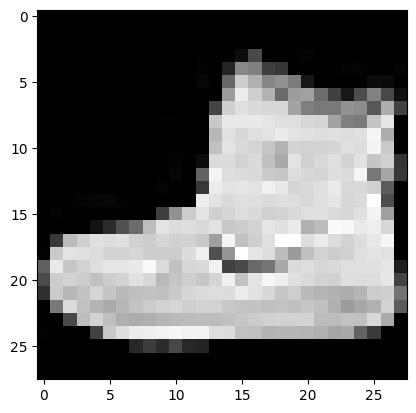

In [45]:
plt.imshow(image.squeeze(), cmap="gray")

### 7.1 Stepping through `nn.Conv2d()`

In [46]:
# Creating dummy data
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [47]:
test_image.shape

torch.Size([3, 64, 64])

In [48]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # also known as a 'filter'
                       stride=1,  # stride of the convolving kernel
                       padding=0)   # adds pixels around the edge, so that our kernal can operate on edges of image

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

## 7.3 Setup a loss function and optimizer for model_2

In [49]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 training and testing out model_2 using our training and test functions

In [50]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_model_2 = timer()

# Train and test
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
-------
Train loss: 0.59147 | Train acc: 78.54%
Test loss: 0.39708 | Test acc: 85.45%

Epoch: 1 
-------
Train loss: 0.35676 | Train acc: 87.09%
Test loss: 0.34427 | Test acc: 87.43%

Epoch: 2 
-------
Train loss: 0.31920 | Train acc: 88.53%
Test loss: 0.32998 | Test acc: 88.07%

Epoch: 3 
-------
Train loss: 0.29801 | Train acc: 89.22%
Test loss: 0.32788 | Test acc: 87.83%

Epoch: 4 
-------
Train loss: 0.28426 | Train acc: 89.71%
Test loss: 0.30615 | Test acc: 88.95%

Train time on cuda: 61.841 seconds


In [51]:
# Get a results dictionary
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

In [52]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.306147038936615,
 'model_acc': 88.9476837060703}

In [53]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 8. Comparing model results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.956365,64.996006
2,FashionMNISTModelV2,0.306147,88.947684


In [55]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.166284
1,FashionMNISTModelV1,0.956365,64.996006,27.166284
2,FashionMNISTModelV2,0.306147,88.947684,61.840928


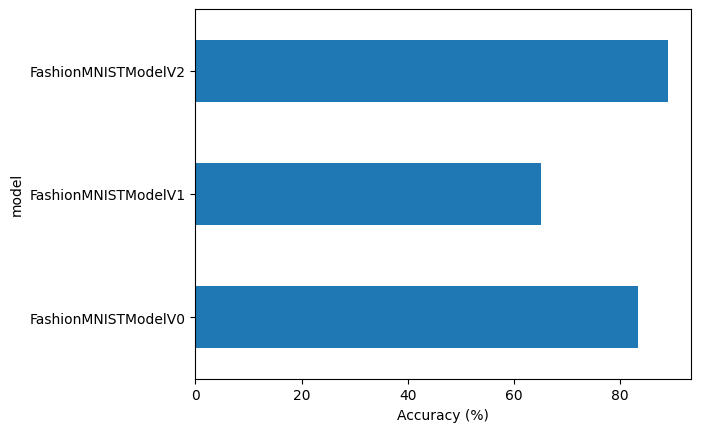

In [56]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and put on target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass ( model outputs raw logits )
      pred_logit = model(sample)

      # get prediction probability ( logit -> pred prob )
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [58]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [59]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

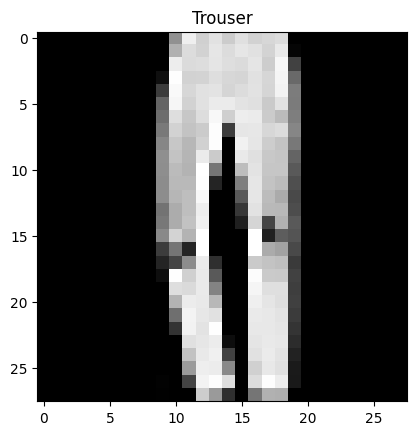

In [60]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [61]:
# Make predictions - randomly pick data from the test sets and predict on them to see what the model is doing
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two predicition probabilities
pred_probs[:2]

tensor([[1.4158e-04, 9.9856e-01, 8.2036e-07, 1.1301e-03, 7.7257e-05, 2.8284e-05,
         3.3895e-05, 3.7606e-06, 2.1355e-05, 7.9869e-06],
        [1.4189e-05, 9.0045e-08, 7.5773e-06, 2.3838e-08, 9.8121e-09, 9.9950e-01,
         4.2079e-07, 7.1933e-06, 1.6509e-05, 4.5740e-04]])

In [62]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 5, 7, 7, 3, 4, 8, 8, 0])

In [63]:
test_labels

[1, 5, 7, 7, 3, 4, 8, 8, 0]

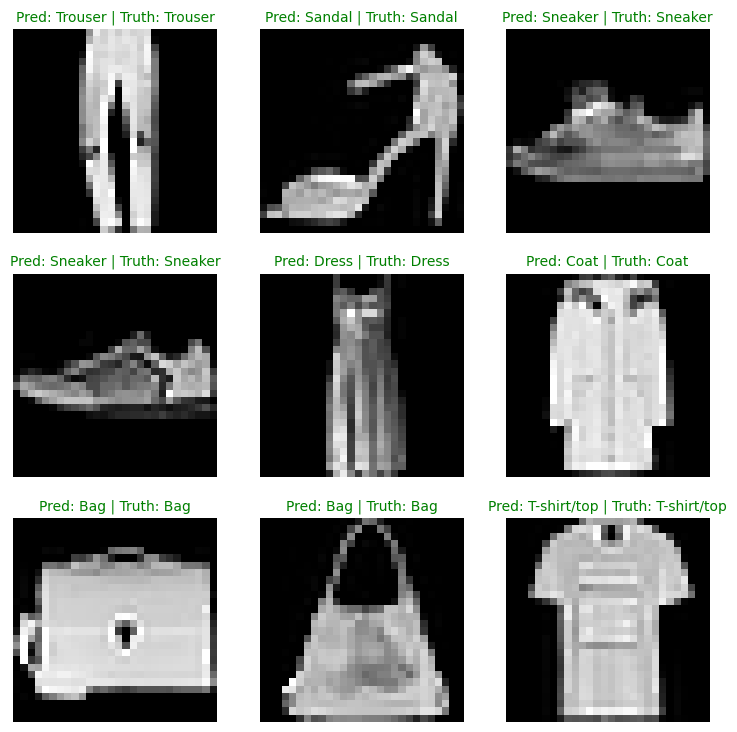

In [64]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")  ## green test if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")  ## red test if prediction is not same as truth

  plt.axis(False);

## 10. Making a confustion matrix for further prediction evaluation

1. Make predicitons with out trained model on the test dataset
2. make a confusion matrix - `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [65]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits to predicition probs to pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

  # Concatinate list of predictions into a tensor
  # print(y_preds)
  y_pred_tensor = torch.cat(y_preds)



Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [66]:
  y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 2])

In [67]:
len(y_pred_tensor)

10000

In [68]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 52.1 MB/s eta 0:00:00
mlxtend version: 0.23.4


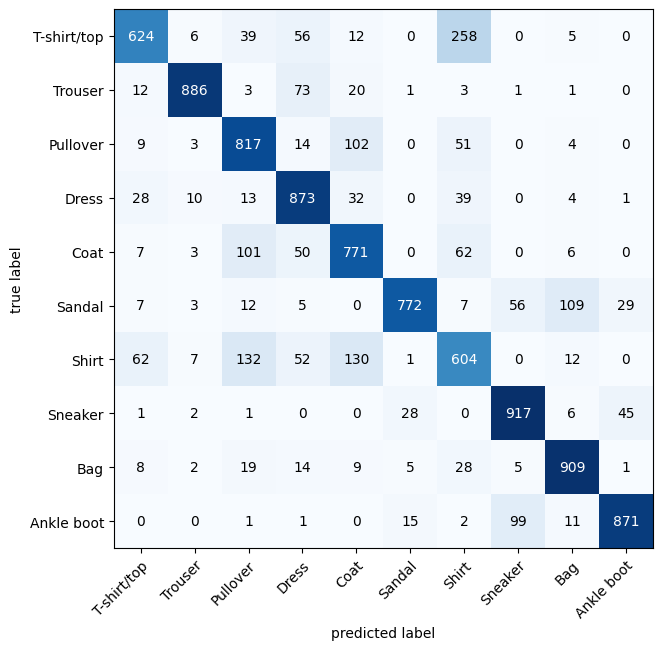

In [69]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and comparing predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. PLot the confustion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), ## matplotlib likes working with numpy
                                class_names=class_names,
                                figsize=(10, 7)
                                )

## 11. Save and load best performing model

In [71]:
from pathlib import Path

# Create a model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create a model save path
MODEL_NAME = "03_pytorch_computervision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the models state_dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/03_pytorch_computervision_model_2.pth


In [73]:
# Create a new instance of model_2
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state_dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [74]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.306147038936615,
 'model_acc': 88.9476837060703}

In [75]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.306147038936615,
 'model_acc': 88.9476837060703}

In [76]:
# Check if results are close to eachother
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)